Visualize the structure of the optimal solutions

In [1]:
import omegaconf
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ultk.effcomm.rate_distortion import ib_encoder_to_point

# Lets us import ibsg modules
import sys
sys.path.append("/Users/nathanielimel/uci/projects/ibsg/src")
from game.game import Game

from tqdm import tqdm

from misc.vis import get_centroid_lineplot

In [2]:
parent = Path("/Users/nathanielimel/uci/projects/ibsg/multirun/universe=100/num_signals=100/prior=-8/dist=squared_dist/meaning_certainty=0/dynamics=imprecise_conditional_imitation/ii=0/discr_need=-3/population_init=0/population_size=None/num_runs=1/seed=0")

config = omegaconf.OmegaConf.load(parent / ".hydra/config.yaml")
g = Game.from_hydra(config)

# bound data
betas = np.load('/Users/nathanielimel/uci/projects/ibsg/multirun/universe=100/num_signals=100/prior=-8/dist=squared_dist/meaning_certainty=0/betas.npy')

optimal_encoders = np.load('/Users/nathanielimel/uci/projects/ibsg/multirun/universe=100/num_signals=100/prior=-8/dist=squared_dist/meaning_certainty=0/optimal_encoders.npy')

curve_data = pd.read_csv('/Users/nathanielimel/uci/projects/ibsg/multirun/universe=100/num_signals=100/prior=-8/dist=squared_dist/meaning_certainty=0/curve_points.csv')

In [3]:
prior = g.prior

idx_to_data = [{"encoder": optimal_encoders[idx], "beta": betas[idx]} for idx in range(len(optimal_encoders))]

1.809571541243321

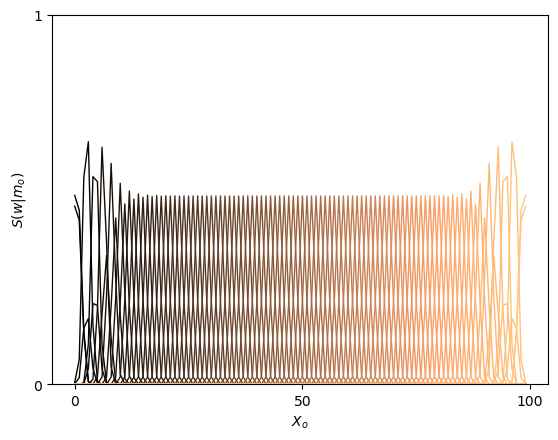

In [4]:
idx = 1000
get_centroid_lineplot(
    idx_to_data[idx]["encoder"],
    prior,
)
idx_to_data[idx]["beta"]

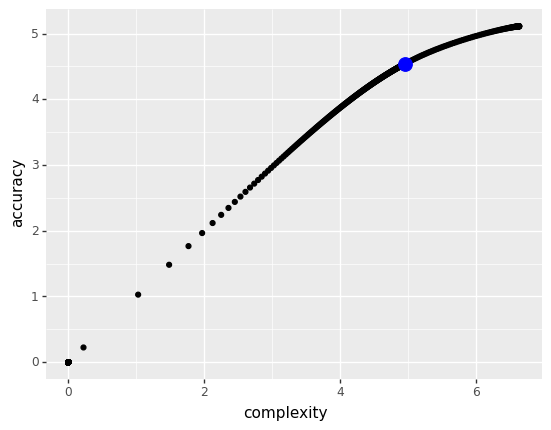

<ggplot: (348160784)>

In [5]:
import plotnine as pn

(
    pn.ggplot(
        curve_data,
        pn.aes(
            x="complexity",
            y="accuracy",
        )
    )
    + pn.geom_point()
    + pn.geom_point(
        data=curve_data[curve_data.beta == betas[idx]],
        size=5,
        color="blue",
    )
)


### Movie visualizing solutions to reverse annealing

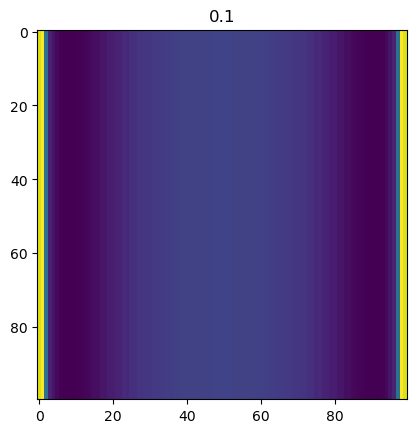

100%|██████████| 1099/1099 [00:52<00:00, 20.94it/s]


In [12]:
from IPython.display import clear_output

for idx in tqdm(range(len(optimal_encoders))[::-1], total=len(optimal_encoders)):
    clear_output(True)
    # plt.imshow(optimal_encoders[idx])
    fig = get_centroid_lineplot(
        idx_to_data[idx]["encoder"],
        prior,
    )
    plt.title(betas[idx])
    plt.show()